**CELL 1 — Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**CELL 2 — Load Data**

In [8]:
df = pd.read_csv("../../data/processed/solar_features.csv")
df["DATE_TIME"] = pd.to_datetime(df["DATE_TIME"])
df.head()


,DATE_TIME,DC_POWER,AC_POWER,hour,day,month,dayofweek,ac_lag_1,ac_lag_2,ac_lag_24,dc_lag_1,dc_lag_2,dc_lag_24,ac_roll_mean_3,ac_roll_mean_6,dc_roll_mean_3,dc_roll_mean_6
0,2020-05-15 00:15:00,0.0,0.0,0,15,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-05-15 00:15:00,0.0,0.0,0,15,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-05-15 00:15:00,0.0,0.0,0,15,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-05-15 00:15:00,0.0,0.0,0,15,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-05-15 00:15:00,0.0,0.0,0,15,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**CELL 3 — Basic Understanding (PdM View)**

In [9]:
df.describe()

,DATE_TIME,DC_POWER,AC_POWER,hour,day,month,dayofweek,ac_lag_1,ac_lag_2,ac_lag_24,dc_lag_1,dc_lag_2,dc_lag_24,ac_roll_mean_3,ac_roll_mean_6,dc_roll_mean_3,dc_roll_mean_6
count,68064,68064.000000,68064.000000,68064.000000,68064.000000,68064.000000,68064.000000,68064.000000,68064.000000,68064.000000,68064.000000,68064.000000,68064.000000,68064.000000,68064.000000,68064.000000,68064.000000
mean,2020-06-01 08:12:04.982369536,3045.864751,297.909390,11.568994,15.756523,5.518953,2.982355,297.909390,297.909390,297.909390,3045.864751,3045.864751,3045.864751,297.909390,297.909390,3045.864751,3045.864751
min,2020-05-15 00:15:00,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-05-24 00:45:00,0.000000,0.000000,6.000000,9.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020-06-01 14:45:00,372.937500,36.040179,12.000000,16.000000,6.000000,3.000000,36.040179,36.040179,36.040179,372.937500,372.937500,372.937500,36.722024,36.765179,379.931548,380.395833
75%,2020-06-09 20:45:00,6207.392857,608.061607,18.000000,23.000000,6.000000,5.000000,608.061607,608.061607,608.061607,6207.392857,6207.392857,6207.392857,610.663244,612.877827,6233.464286,6256.438988
max,2020-06-17 23:45:00,12899.000000,1257.812500,23.000000,31.000000,6.000000,6.000000,1257.812500,1257.812500,1257.812500,12899.000000,12899.000000,12899.000000,1253.676190,1251.469643,12858.285713,12835.511905
std,NaN,3925.450850,383.628153,6.894343,8.548137,0.499644,2.058750,383.628153,383.628153,383.628153,3925.450850,3925.450850,3925.450850,381.766030,380.959599,3906.267588,3897.960659


**Cell 4 – Time-based visualization**

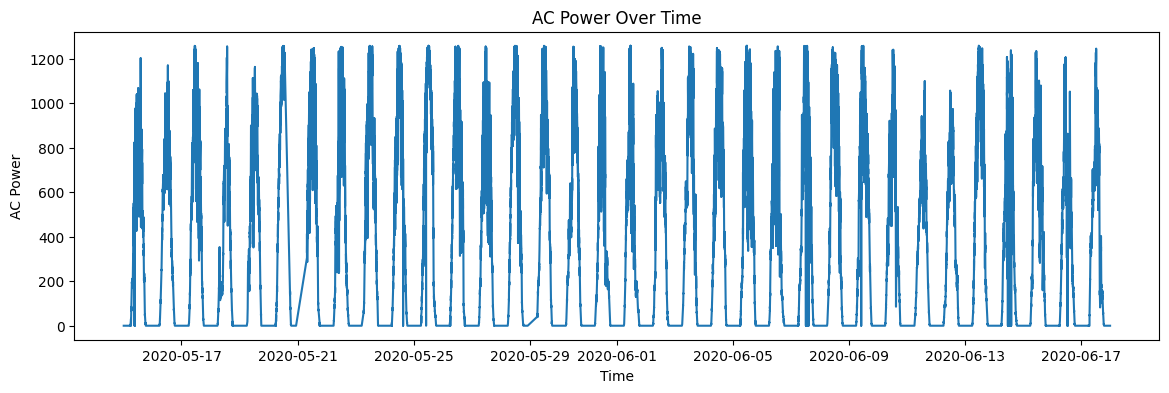

In [10]:
plt.figure(figsize=(14,4))
plt.plot(df["DATE_TIME"], df["AC_POWER"])
plt.title("AC Power Over Time")
plt.xlabel("Time")
plt.ylabel("AC Power")
plt.show()


**CELL 5 — Create Simple Health Indicators**

In [12]:
df["power_ratio"] = df["AC_POWER"] / (df["DC_POWER"] + 1e-6)
df["power_ratio"].describe()


count    68064.000000
mean         0.051884
std          0.048769
min          0.000000
25%          0.000000
50%          0.096676
75%          0.097872
max          0.106592
Name: power_ratio, dtype: float64

**CELL 6 — Flag Suspicious Behavior (Rule-based Baseline)**

In [14]:
df["suspect"] = 0
df.loc[(df["AC_POWER"] < 50) & (df["DC_POWER"] > 200), "suspect"] = 1

df["suspect"].value_counts()


suspect
0    66529
1     1535
Name: count, dtype: int64

**CELL 7 — PREPARE DATA FOR PdM MODEL**

In [19]:
features = [
    "DC_POWER",
    "AC_POWER",
    "ac_lag_1",
    "ac_lag_24",
    "dc_lag_1",
    "dc_lag_24",
    "ac_roll_mean_6",
    "dc_roll_mean_6"
]

X = df[features]
X.head()


,DC_POWER,AC_POWER,ac_lag_1,ac_lag_24,dc_lag_1,dc_lag_24,ac_roll_mean_6,dc_roll_mean_6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**CELL 8 — TRAIN ISOLATION FOREST**

In [20]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(
    n_estimators=200,
    contamination=0.01,   # ~1% abnormal events
    random_state=42
)

df["anomaly"] = iso_forest.fit_predict(X)


**CELL 9 — CHECK RESULTS**

In [21]:
df["anomaly"].value_counts()


anomaly
 1    67383
-1      681
Name: count, dtype: int64

**CELL 10 — VISUALIZE ANOMALIES (KEY RESULT**

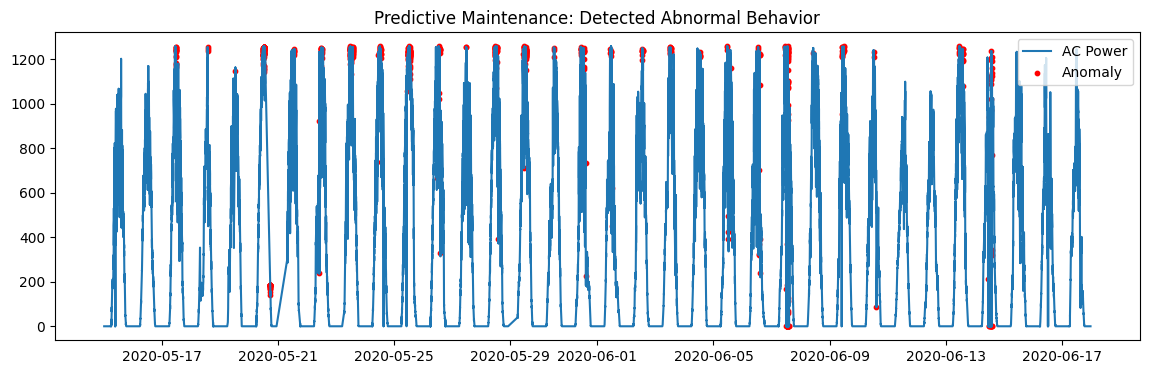

In [22]:
plt.figure(figsize=(14,4))
plt.plot(df["DATE_TIME"], df["AC_POWER"], label="AC Power")

plt.scatter(
    df[df["anomaly"] == -1]["DATE_TIME"],
    df[df["anomaly"] == -1]["AC_POWER"],
    color="red",
    s=10,
    label="Anomaly"
)

plt.legend()
plt.title("Predictive Maintenance: Detected Abnormal Behavior")
plt.show()


**Cell 11 Save the PdM Model**

In [23]:
import joblib
import os

# create models folder if not exists
os.makedirs("../models", exist_ok=True)

# save Isolation Forest model
joblib.dump(iso_forest, "../models/pdm_isolation_forest.pkl")

print("PdM model saved successfully")


PdM model saved successfully


**Cell 12 Save the features used (so future data matches):**

In [25]:
joblib.dump(features, "../models/pdm_features.pkl")


['../models/pdm_features.pkl']